In [7]:
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import tensorflow as tf
import numpy as np

batch_size = 256
classes = 10

def Relu(y):
    return torch.maximum(torch.tensor(0), y)

def softmax(y):
    for i in range(len(y)):
        y[i] = torch.exp(y[i])/torch.sum(torch.exp(y[i]))
    return y  
        
def cross_entropy_loss(p, q):
    tmp = torch.zeros((len(q), classes))
    for i in range((len(q))):
        tmp[i][p[i].item()] += 1.0
    
    ans = torch.zeros((len(q)))
    
    for i in range((len(q))):
        ans[i] = torch.sum(-(tmp[i]*torch.log(q[i])))    
    return torch.mean(ans)

In [8]:
fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

In [9]:
w1 = torch.normal(0, 0.01, size=(28*28, 256), requires_grad=True)
b1 = torch.zeros(256, requires_grad=True)
w2 = torch.normal(0, 0.01, size=(256, classes), requires_grad=True)
b2 = torch.zeros(classes, requires_grad=True)

epoch_num = 100
optimizer = optim.SGD([w1, b1, w2, b2], lr = 0.02)
running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for i, (images, labels) in enumerate(train_loader): 
        images = images.view(-1,28*28)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs = torch.matmul(images, w1)+ b1
            outputs = Relu(outputs)
            outputs = torch.matmul(outputs, w2)+ b2
            pred_y = softmax(outputs)                 
            loss = cross_entropy_loss(labels, pred_y) 
            running_loss[epoch] += torch.sum(loss)/batch_size

        loss.backward()
        optimizer.step()                              
        
    print("epoch : %d, loss : %.4lf" % (epoch, running_loss[epoch]))
        
        
print(running_loss)

epoch : 0, loss : 1.6821
epoch : 1, loss : 0.9331
epoch : 2, loss : 0.7399
epoch : 3, loss : 0.6602
epoch : 4, loss : 0.6064
epoch : 5, loss : 0.5662
epoch : 6, loss : 0.5351
epoch : 7, loss : 0.5113
epoch : 8, loss : 0.4929
epoch : 9, loss : 0.4783
epoch : 10, loss : 0.4664
epoch : 11, loss : 0.4563
epoch : 12, loss : 0.4479
epoch : 13, loss : 0.4396
epoch : 14, loss : 0.4337
epoch : 15, loss : 0.4280
epoch : 16, loss : 0.4231
epoch : 17, loss : 0.4183
epoch : 18, loss : 0.4146
epoch : 19, loss : 0.4099
epoch : 20, loss : 0.4067
epoch : 21, loss : 0.4029
epoch : 22, loss : 0.4000
epoch : 23, loss : 0.3971
epoch : 24, loss : 0.3942
epoch : 25, loss : 0.3912
epoch : 26, loss : 0.3892
epoch : 27, loss : 0.3860
epoch : 28, loss : 0.3836
epoch : 29, loss : 0.3815
epoch : 30, loss : 0.3790
epoch : 31, loss : 0.3768
epoch : 32, loss : 0.3744
epoch : 33, loss : 0.3719
epoch : 34, loss : 0.3698
epoch : 35, loss : 0.3679
epoch : 36, loss : 0.3663
epoch : 37, loss : 0.3644
epoch : 38, loss : 0.3

In [10]:
def whichclass(pred_y):
    _, label = torch.max(pred_y, 1)
    return label

In [11]:
from matplotlib import pyplot as plt

acc = 0.0
correct = 0.0
count = 0.0

for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1,28*28)
    outputs = torch.matmul(images, w1)+ b1
    outputs = Relu(outputs)
    outputs = torch.matmul(outputs, w2)+ b2
    pred_label1 = softmax(outputs)
    pred_label = whichclass(pred_label1)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        
        count += 1

acc = correct/count
print(acc)

0.868


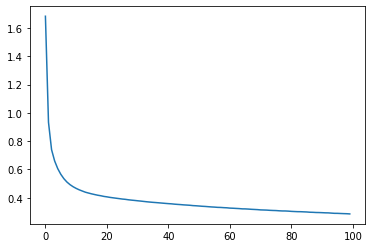

In [12]:
plt.plot(running_loss)